In [2]:
import numpy as np
from numpy import loadtxt
from astropy.io import fits
import scipy.constants as cnt
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = (10 , 5)

In [3]:
data = loadtxt('dados/test_3741_6.ares' , float) # loads the file with the data
fit_data = data[:,8] # an array with the fitted values of the wavelength
data_error = data[:,9] # an array with the error of the fitted values of the wavelength

In [4]:
filtro = fits.getdata("dados/ESPRESSO_G9.fits")
ori_lambda = filtro["lambda"]
ori_contrast = filtro["contrast"]

distances = np.abs(ori_lambda[:, np.newaxis] - data[:,0])
closest_indices = np.argmin(distances, axis=0)
ref_data = ori_lambda[closest_indices]
contrast = ori_contrast[closest_indices]

ARES_RV = -16600
CCF = -16649.669

# 229

In [5]:
lambda_ref = np.zeros(0)
lambda_fit_229 = np.zeros(0)
error = np.zeros(0)

for i, l in enumerate(ref_data):
    if contrast[i] >= 0.55:
        lambda_ref = np.append(lambda_ref,l)
        lambda_fit_229 = np.append(lambda_fit_229,fit_data[i])
        error = np.append(error,data_error[i])
    else:
        pass
    
N_dim_229 = np.zeros(3,dtype=int)
N_dim_229[0] = len(lambda_ref)

In [6]:
RV = (lambda_fit_229 - lambda_ref) / lambda_ref * cnt.c # RV calculation
uncert_229 = error / lambda_ref *cnt.c

mean = 53.52528 m/s ; standard deviation / √N = 94.96378 m/s
weighted mean = -36.21880 m/s ; weighted standard deviation / √N = 1.37660 m/s
median = -41.22648 m/s


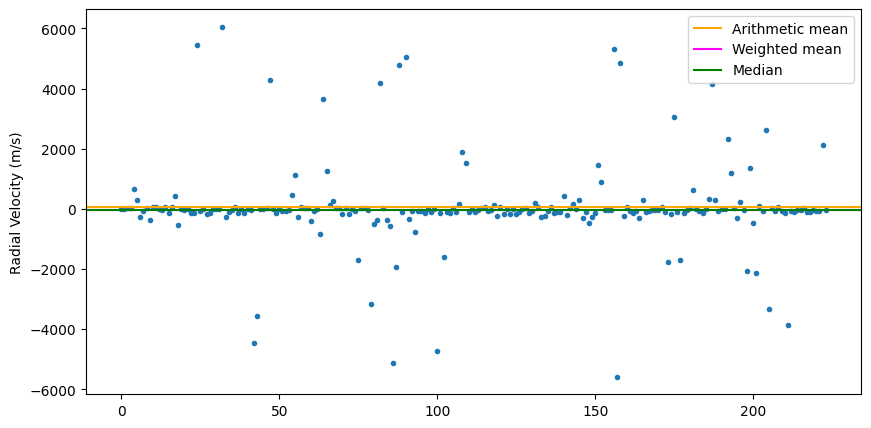

In [7]:
std = np.std(RV) # standard deviation of the values of the RVs
mean = np.mean(RV) # mean of the values of the RVs

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV - wmean) / uncert_229
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    wmean = (RV * pi * uncert_229 ** (-2)).sum() / (pi * uncert_229 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_229 ** (-2)).sum())
    sigma = (RV - wmean) / uncert_229
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
median = np.median(RV) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

mean = -16546.47472 m/s ; standard deviation / √N = 94.96378 m/s
weighted mean = -16636.21880 m/s ; weighted standard deviation / √N = 1.37660 m/s
median = -16641.22648 m/s


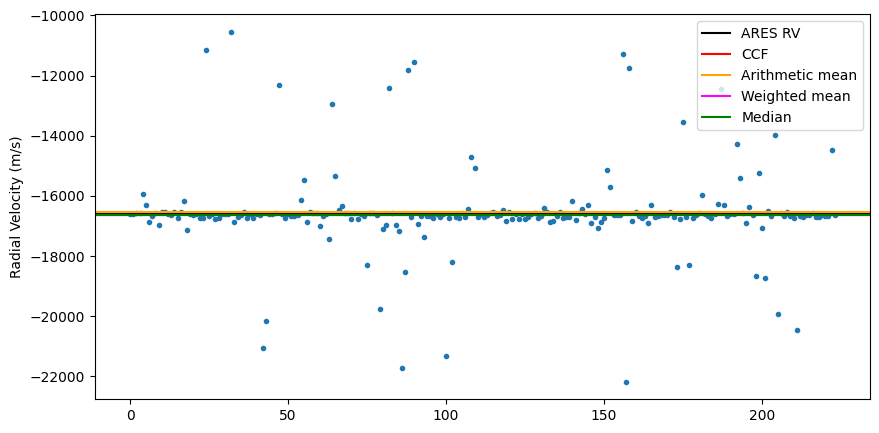

In [8]:
print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers

mean = -24.63135 m/s ; standard deviation / √N = 38.59535 m/s
weighted mean = -38.55540 m/s ; weighted standard deviation / √N = 1.44004 m/s
median = -42.68612 m/s


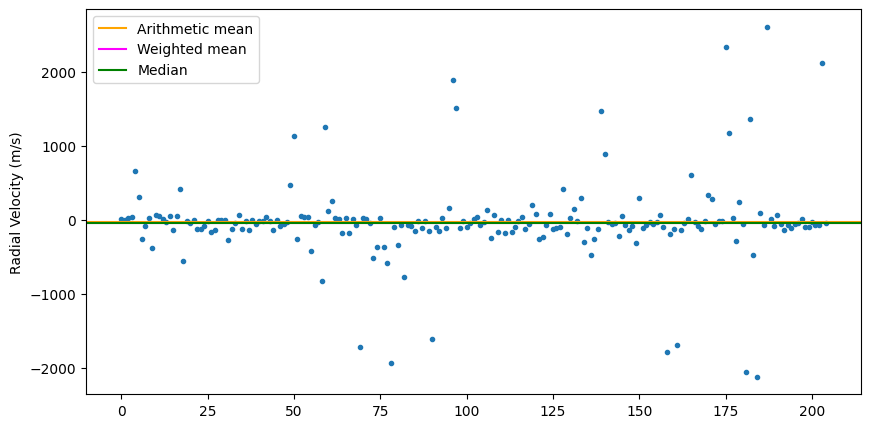

In [9]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert_229[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
corr_median = np.median(corrRV)

N_dim_229[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

mean = -16624.63135 m/s ; standard deviation / √N = 38.59535 m/s
weighted mean = -16638.55540 m/s ; weighted standard deviation / √N = 1.44004 m/s
median = -16642.68612 m/s


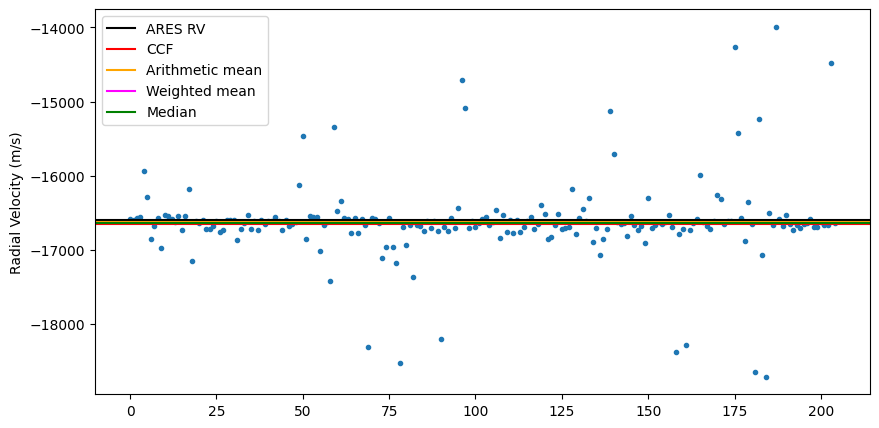

In [10]:
print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers (2)

mean = -48.01302 m/s ; standard deviation / √N = 14.54402 m/s
weighted mean = -39.69051 m/s ; weighted standard deviation / √N = 1.50897 m/s
median = -45.14565 m/s


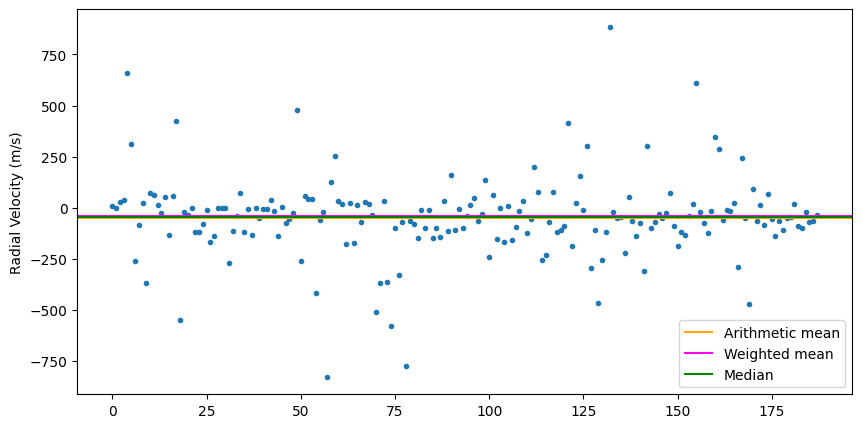

In [11]:
corr2RV = np.zeros(0)
corr2_uncert = np.zeros(0)

for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
    if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
        corr2RV = np.append(corr2RV,rv)
        corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)

corr2_wmean = corr2_mean
corr2_wstd = 0
f0 = 2e-3
sigma = (corr2RV - corr2_wmean) / corr2_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
    corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
    sigma = (corr2RV - corr2_wmean) / corr2_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
corr2_median = np.median(corr2RV)

mean_229 = corr2_mean
std_229 = corr2_std
wmean_229 = corr2_wmean
wstd_229 = corr2_wstd
median_229 = corr2_median

N_dim_229[2] = len(corr2RV)

STD = np.array([std,corr_std,corr2_std])

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median))

plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median, label= 'Median', color ='green')
plt.legend()
plt.show()

mean = -16648.01302 m/s ; standard deviation / √N = 14.54402 m/s
weighted mean = -16639.69051 m/s ; weighted standard deviation / √N = 1.50897 m/s
median = -16645.14565 m/s


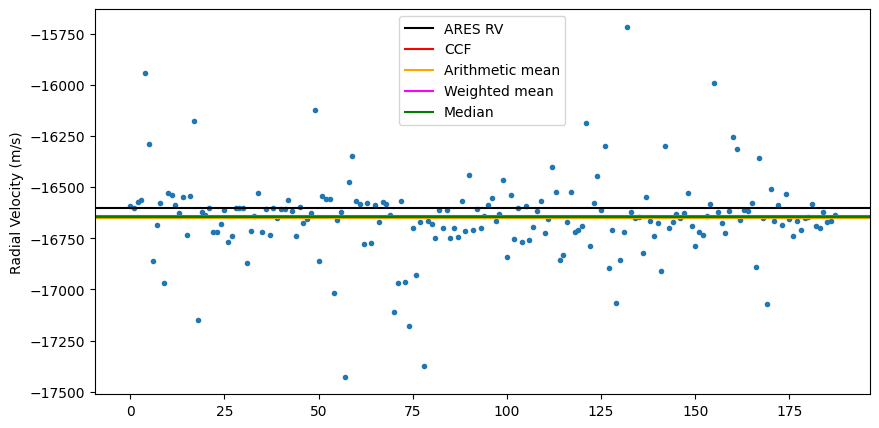

In [12]:
print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## 595

In [13]:
lambda_ref = np.zeros(0)
lambda_fit_595 = np.zeros(0)
error = np.zeros(0)

for i, l in enumerate(ref_data):
    if contrast[i] >= 0.35:
        lambda_ref = np.append(lambda_ref,l)
        lambda_fit_595 = np.append(lambda_fit_595,fit_data[i])
        error = np.append(error,data_error[i])
    else:
        pass
    
N_dim_595 = np.zeros(3,dtype=int)
N_dim_595[0] = len(lambda_ref)

In [14]:
RV = (lambda_fit_595 - lambda_ref) / lambda_ref * cnt.c # RV calculation
uncert_595 = error / lambda_ref *cnt.c

mean = 114.69819 m/s ; standard deviation / √N = 53.05038 m/s
weighted mean = -18.73430 m/s ; weighted standard deviation / √N = 0.41654 m/s
median = -23.43306 m/s


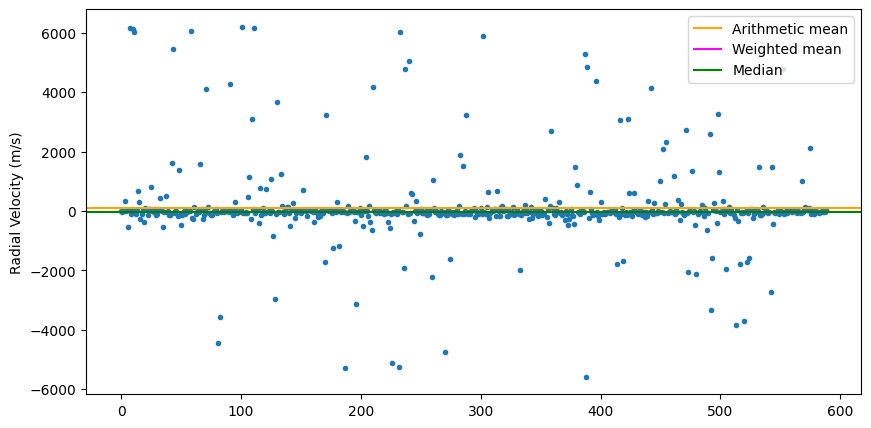

mean = -16485.30181 m/s ; standard deviation / √N = 53.05038 m/s
weighted mean = -16618.73430 m/s ; weighted standard deviation / √N = 0.41654 m/s
median = -16623.43306 m/s


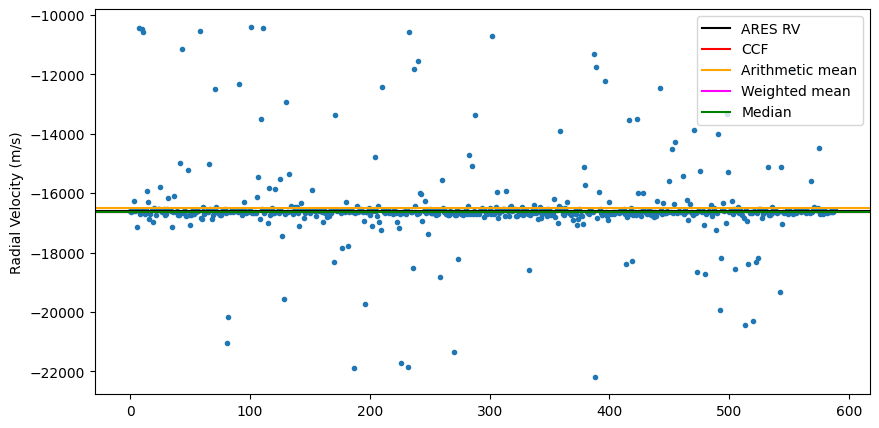

In [15]:
std = np.std(RV) # standard deviation of the values of the RVs
mean = np.mean(RV) # mean of the values of the RVs

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV - wmean) / uncert_595
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    wmean = (RV * pi * uncert_595 ** (-2)).sum() / (pi * uncert_595 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_595 ** (-2)).sum())
    sigma = (RV - wmean) / uncert_595
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
median = np.median(RV) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers

mean = -12.36119 m/s ; standard deviation / √N = 20.39282 m/s
weighted mean = -19.56758 m/s ; weighted standard deviation / √N = 0.43189 m/s
median = -25.40406 m/s


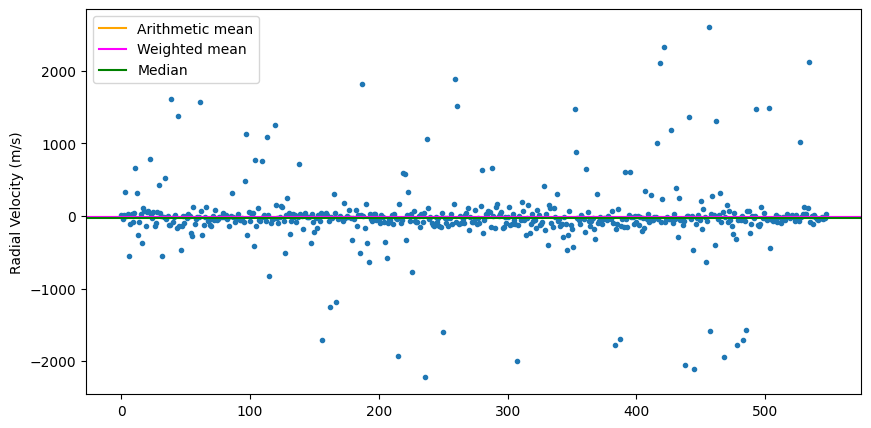

mean = -16612.36119 m/s ; standard deviation / √N = 20.39282 m/s
weighted mean = -16619.56758 m/s ; weighted standard deviation / √N = 0.43189 m/s
median = -16625.40406 m/s


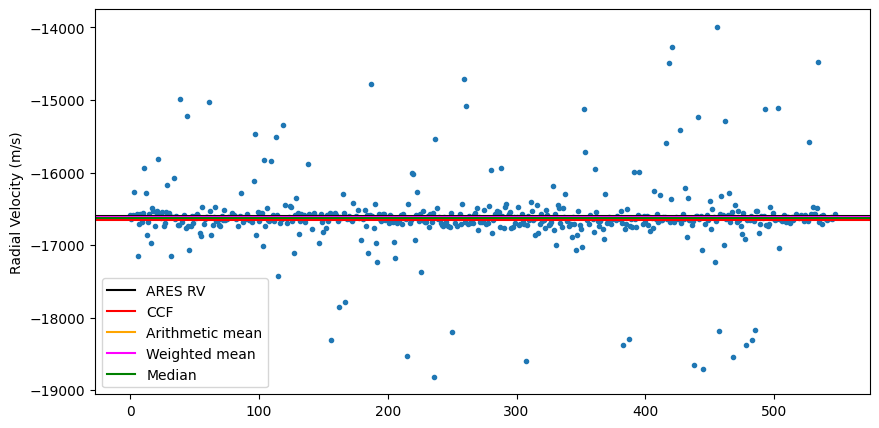

In [16]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert_595[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
corr_median = np.median(corrRV)

N_dim_595[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers (2)

mean = -24.41362 m/s ; standard deviation / √N = 8.29887 m/s
weighted mean = -21.59055 m/s ; weighted standard deviation / √N = 0.44850 m/s
median = -27.03036 m/s


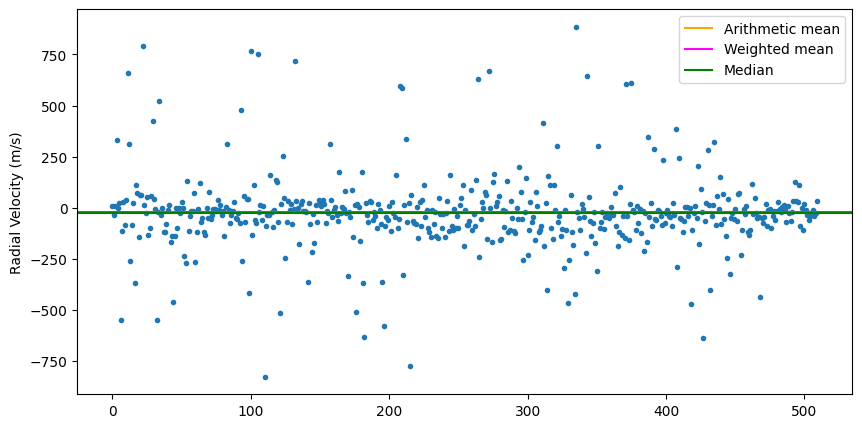

mean = -16624.41362 m/s ; standard deviation / √N = 8.29887 m/s
weighted mean = -16621.59055 m/s ; weighted standard deviation / √N = 0.44850 m/s
median = -16627.03036 m/s


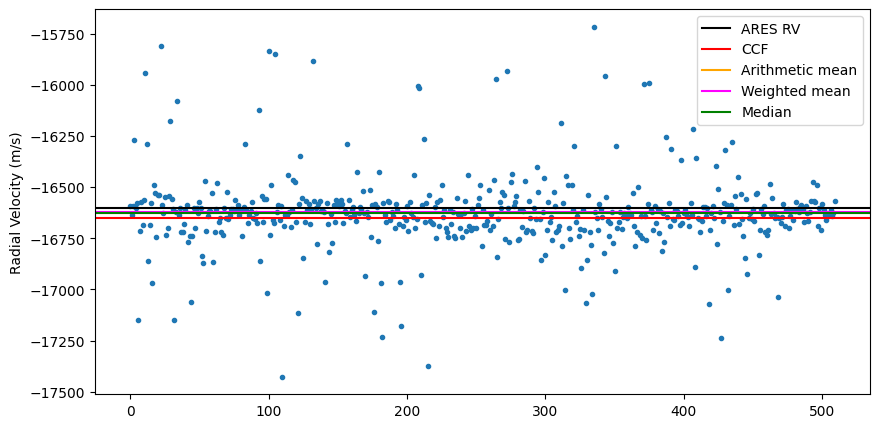

In [17]:
corr2RV = np.zeros(0)
corr2_uncert = np.zeros(0)

for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
    if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
        corr2RV = np.append(corr2RV,rv)
        corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)

corr2_wmean = corr2_mean
corr2_wstd = 0
f0 = 2e-3
sigma = (corr2RV - corr2_wmean) / corr2_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
    corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
    sigma = (corr2RV - corr2_wmean) / corr2_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
corr2_median = np.median(corr2RV)

mean_595 = corr2_mean
std_595 = corr2_std
wmean_595 = corr2_wmean
wstd_595 = corr2_wstd
median_595 = corr2_median

N_dim_595[2] = len(corr2RV)

STD = np.array([std,corr_std,corr2_std])

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median))

plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

# 1030

In [18]:
lambda_ref = np.zeros(0)
lambda_fit_1030 = np.zeros(0)
error = np.zeros(0)

for i, l in enumerate(ref_data):
    if contrast[i] >= 0.2:
        lambda_ref = np.append(lambda_ref,l)
        lambda_fit_1030 = np.append(lambda_fit_1030,fit_data[i])
        error = np.append(error,data_error[i])
    else:
        pass
    
N_dim_1030 = np.zeros(3,dtype=int)
N_dim_1030[0] = len(lambda_ref)

In [19]:
RV = (lambda_fit_1030 - lambda_ref) / lambda_ref * cnt.c # RV calculation
uncert_1030 = error / lambda_ref *cnt.c

mean = 154.89853 m/s ; standard deviation / √N = 37.18158 m/s
weighted mean = -14.90350 m/s ; weighted standard deviation / √N = 0.20124 m/s
median = -14.92163 m/s


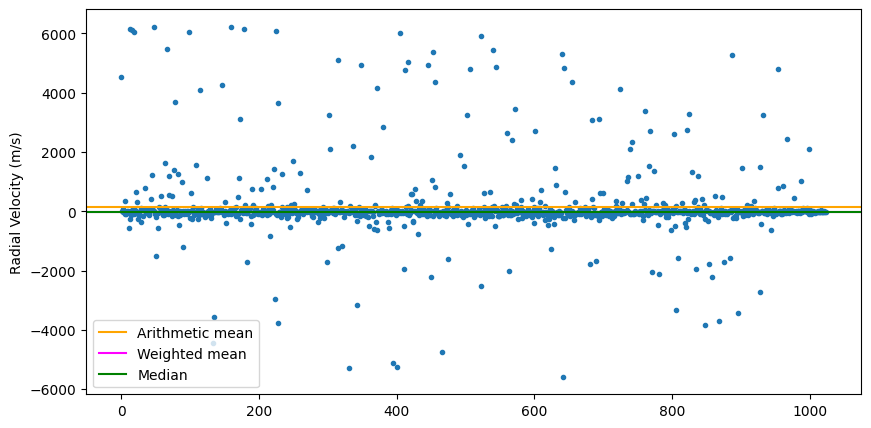

mean = -16445.10147 m/s ; standard deviation / √N = 37.18158 m/s
weighted mean = -16614.90350 m/s ; weighted standard deviation / √N = 0.20124 m/s
median = -16614.92163 m/s


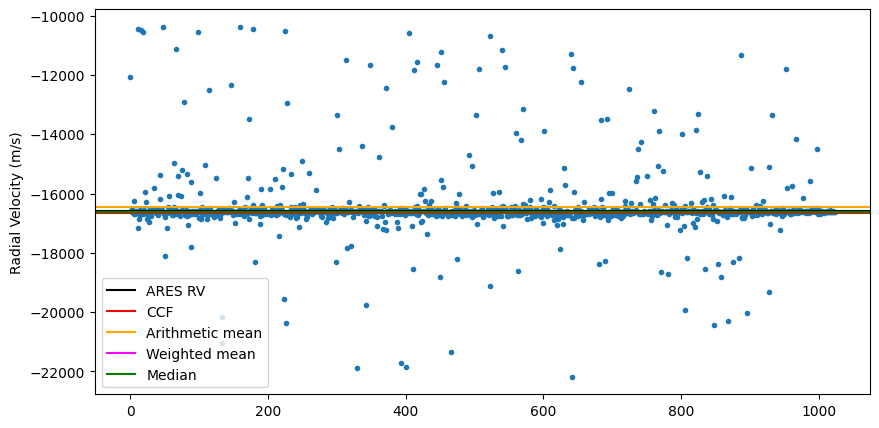

In [20]:
std = np.std(RV) # standard deviation of the values of the RVs
mean = np.mean(RV) # mean of the values of the RVs

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV - wmean) / uncert_1030
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    wmean = (RV * pi * uncert_1030 ** (-2)).sum() / (pi * uncert_1030 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_1030 ** (-2)).sum())
    sigma = (RV - wmean) / uncert_1030
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
median = np.median(RV) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers

mean = 7.86524 m/s ; standard deviation / √N = 14.08959 m/s
weighted mean = -15.42162 m/s ; weighted standard deviation / √N = 0.20787 m/s
median = -17.48928 m/s


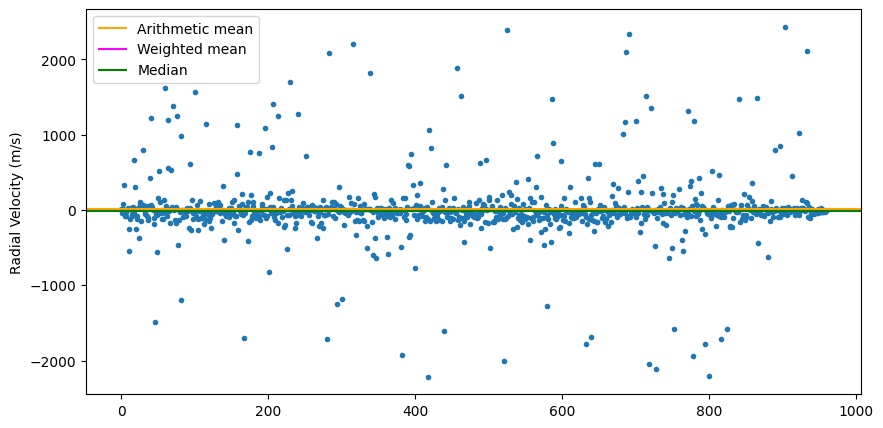

mean = -16592.13476 m/s ; standard deviation / √N = 14.08959 m/s
weighted mean = -16615.42162 m/s ; weighted standard deviation / √N = 0.20787 m/s
median = -16617.48928 m/s


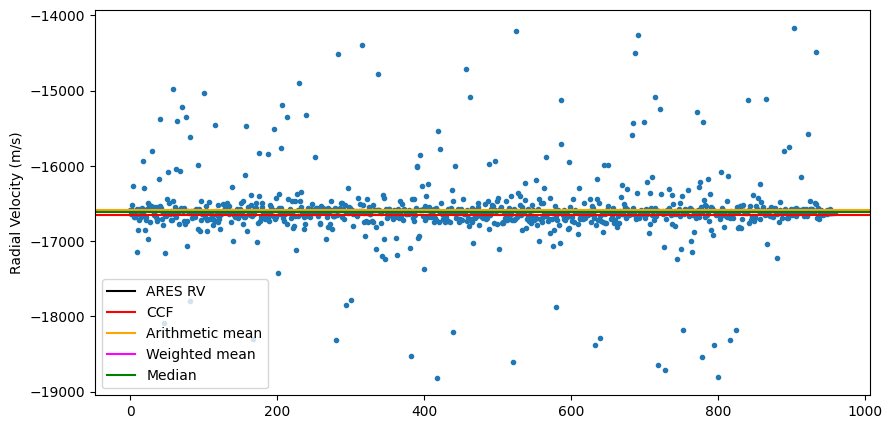

In [21]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert_1030[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
corr_median = np.median(corrRV)

N_dim_1030[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers (2)

mean = -12.96636 m/s ; standard deviation / √N = 6.05862 m/s
weighted mean = -16.86244 m/s ; weighted standard deviation / √N = 0.21468 m/s
median = -19.44128 m/s


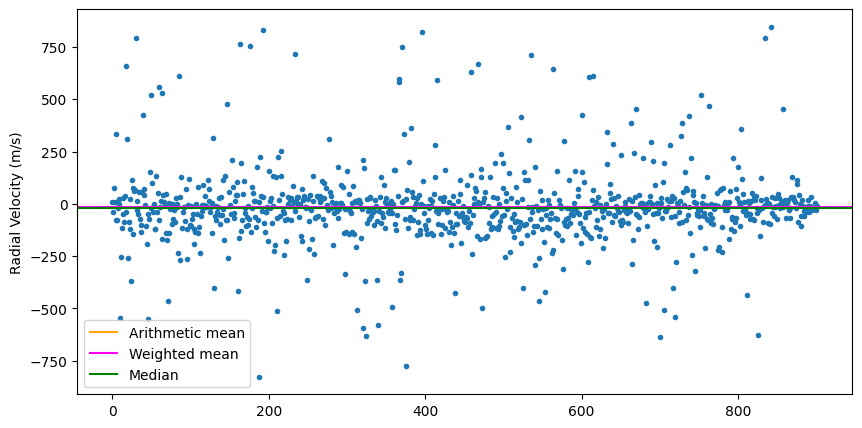

mean = -16612.96636 m/s ; standard deviation / √N = 6.05862 m/s
weighted mean = -16616.86244 m/s ; weighted standard deviation / √N = 0.21468 m/s
median = -16619.44128 m/s


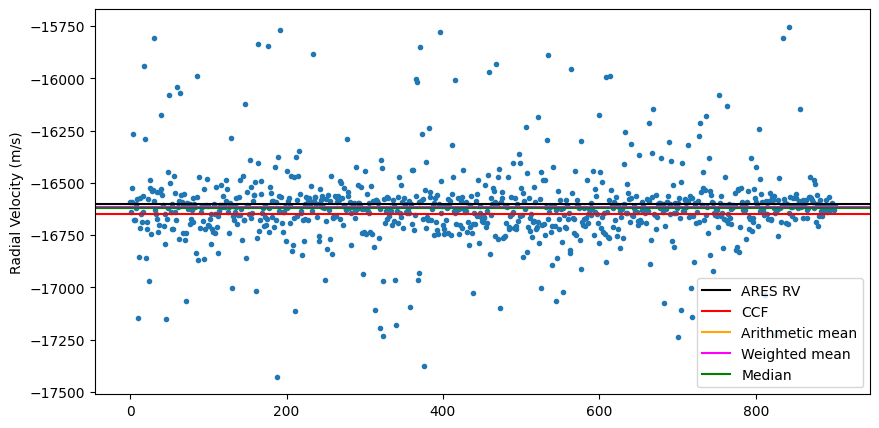

In [22]:
corr2RV = np.zeros(0)
corr2_uncert = np.zeros(0)

for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
    if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
        corr2RV = np.append(corr2RV,rv)
        corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)

corr2_wmean = corr2_mean
corr2_wstd = 0
f0 = 2e-3
sigma = (corr2RV - corr2_wmean) / corr2_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
    corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
    sigma = (corr2RV - corr2_wmean) / corr2_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
corr2_median = np.median(corr2RV)

mean_1030 = corr2_mean
std_1030 = corr2_std
wmean_1030 = corr2_wmean
wstd_1030 = corr2_wstd
median_1030 = corr2_median

N_dim_1030[2] = len(corr2RV)

STD = np.array([std,corr_std,corr2_std])

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median))

plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

# 3741

In [23]:
lambda_ref = ref_data
lambda_fit_3741 = fit_data
error = data_error
    
N_dim_3741 = np.zeros(3,dtype=int)
N_dim_3741[0] = len(lambda_ref)

In [24]:
RV = (lambda_fit_3741 - lambda_ref) / lambda_ref * cnt.c # RV calculation
uncert_3741 = error / lambda_ref *cnt.c

mean = 183.13474 m/s ; standard deviation / √N = 21.62407 m/s
weighted mean = 46.89763 m/s ; weighted standard deviation / √N = 0.03779 m/s
median = -1.18694 m/s


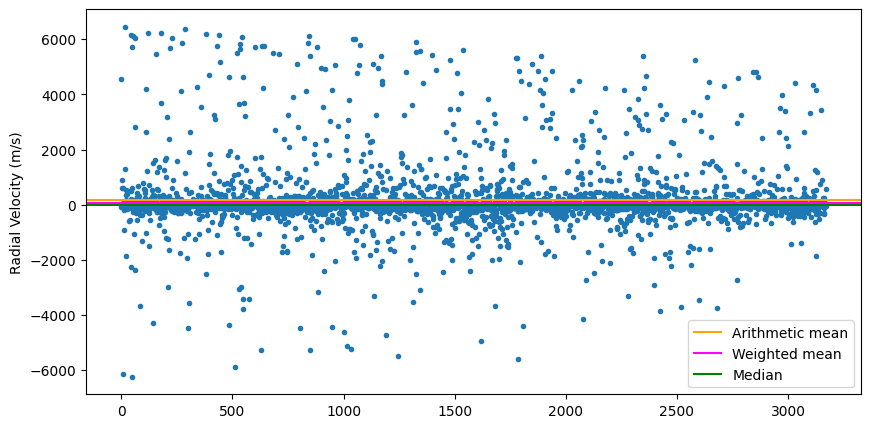

mean = -16416.86526 m/s ; standard deviation / √N = 21.62407 m/s
weighted mean = -16553.10237 m/s ; weighted standard deviation / √N = 0.03779 m/s
median = -16601.18694 m/s


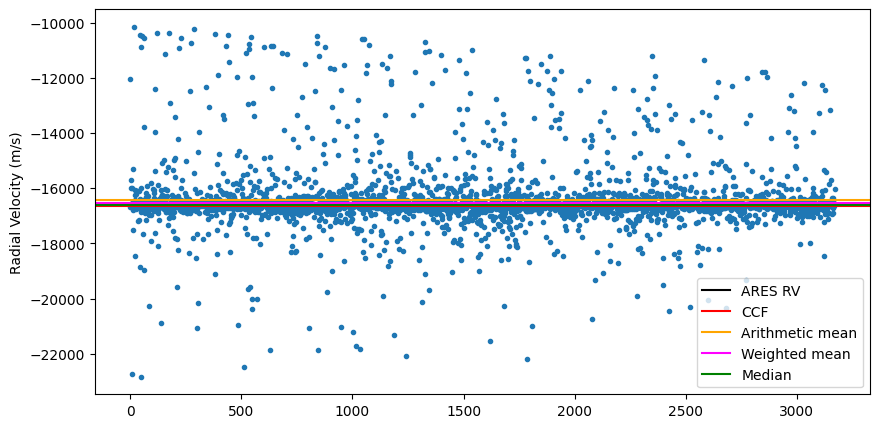

In [25]:
std = np.std(RV) # standard deviation of the values of the RVs
mean = np.mean(RV) # mean of the values of the RVs

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV - wmean) / uncert_3741
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    wmean = (RV * pi * uncert_3741 ** (-2)).sum() / (pi * uncert_3741 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_3741 ** (-2)).sum())
    sigma = (RV - wmean) / uncert_3741
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
median = np.median(RV) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers

mean = 25.36234 m/s ; standard deviation / √N = 9.94688 m/s
weighted mean = 8.17184 m/s ; weighted standard deviation / √N = 0.03776 m/s
median = -7.48303 m/s


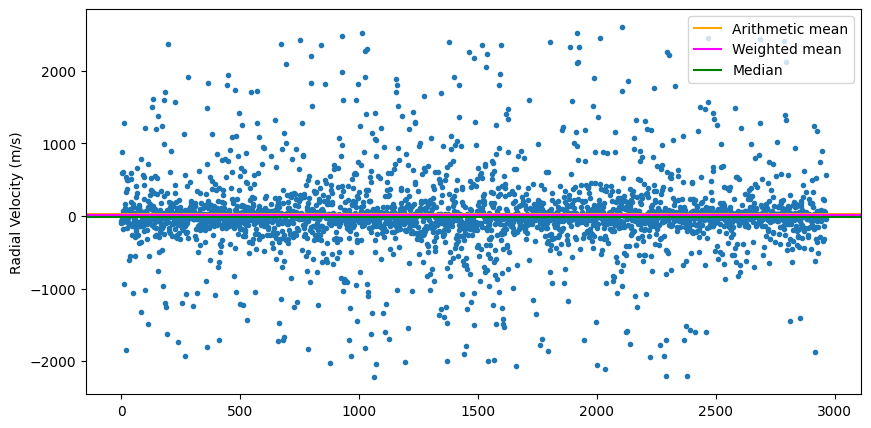

mean = -16574.63766 m/s ; standard deviation / √N = 9.94688 m/s
weighted mean = -16591.82816 m/s ; weighted standard deviation / √N = 0.03776 m/s
median = -16607.48303 m/s


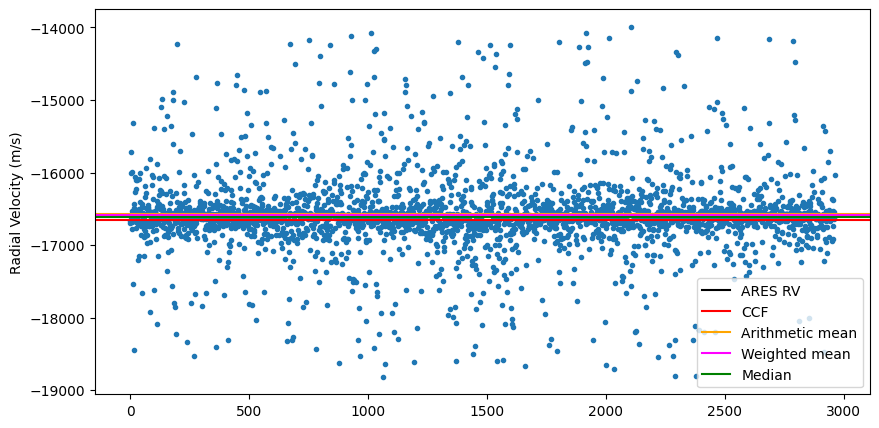

In [26]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert_3741[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
corr_median = np.median(corrRV)

N_dim_3741[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers (2)

In [27]:
# corr2RV = np.zeros(0)
# corr2_uncert = np.zeros(0)

# for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
#     if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
#         corr2RV = np.append(corr2RV,rv)
#         corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
# corr2_mean = np.mean(corr2RV)
# corr2_std = np.std(corr2RV)

# corr2_wmean = corr2_mean
# corr2_wstd = 0
# f0 = 2e-3
# sigma = (corr2RV - corr2_wmean) / corr2_uncert
# pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

# for i in range(2):
#     corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
#     corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
#     sigma = (corr2RV - corr2_wmean) / corr2_uncert
#     pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
# corr2_median = np.median(corr2RV)

# mean_3741 = corr2_mean
# std_3741 = corr2_std
# wmean_3741 = corr2_wmean
# wstd_3741 = corr2_wstd
# median_3741 = corr2_median

# N_dim_3741[2] = len(corr2RV)

# STD = np.array([std,corr_std,corr2_std])

# print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
# print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
# print('median = {:.5f} m/s'.format(corr2_median))

# plt.plot(corr2RV,'.')
# plt.ylabel('Radial Velocity (m/s)')
# plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
# plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
# plt.axhline(corr2_median, label= 'Median', color ='green')
# plt.legend()
# plt.show()

# print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
# print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
# print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

# plt.plot(corr2RV + ARES_RV,'.')
# plt.ylabel('Radial Velocity (m/s)')
# plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
# plt.axhline(CCF, label= 'CCF', color ='red')
# plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
# plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
# plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
# plt.legend()
# plt.show()

## Mean RV for a diferent number of initial wavelegnhts

In [28]:
Means = np.array([mean_229,mean_595,mean_1030,mean_3741])
Std = np.array([std_229,std_595,std_1030,std_3741])
Wmeans = np.array([wmean_229,wmean_595,wmean_1030,wmean_3741])
Wstd = np.array([wstd_229,wstd_595,wstd_1030,wstd_3741])
Medians = np.array([median_229,median_595,median_1030,median_3741])

Std_root = np.array([std_229 / np.sqrt(N_dim_229[2]),std_595 / np.sqrt(N_dim_595[2]),std_1030 / np.sqrt(N_dim_1030[2]),std_3741 / np.sqrt(N_dim_3741[2])])
Wstd_root = np.array([wstd_229 / np.sqrt(N_dim_229[2]),wstd_595 / np.sqrt(N_dim_595[2]),wstd_1030 / np.sqrt(N_dim_1030[2]),wstd_3741 / np.sqrt(N_dim_3741[2])])

N_wave = np.array([229,595,1030,3741])

#plt.errorbar(N_wave,Means,yerr=Std,ecolor='blue',fmt='o',label='Mean')
plt.errorbar(N_wave,Means,yerr=Std_root,ecolor='orange',fmt='o',label='Mean')
plt.plot(N_wave,Medians,'o',label='Median',color='green')
plt.legend()
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
plt.title('Mean and median comparison')
plt.show()

#plt.errorbar(N_wave,Wmeans,yerr=Wstd,ecolor='blue',fmt='o',label='Weighted mean')
plt.errorbar(N_wave,Wmeans,yerr=Wstd_root,ecolor='orange',fmt='o',label='Weighted mean')
plt.plot(N_wave,Medians,'o',label='Median',color='green')
plt.legend()
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
plt.title('Weighted mean and median comparison')
plt.show()

NameError: name 'mean_3741' is not defined

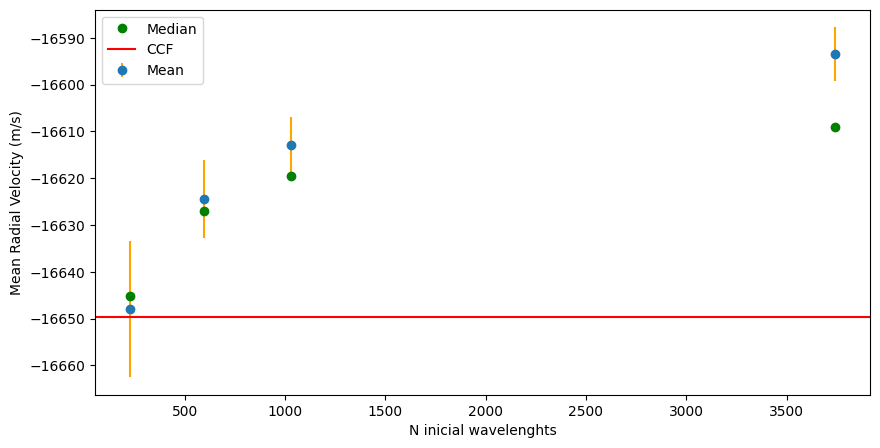

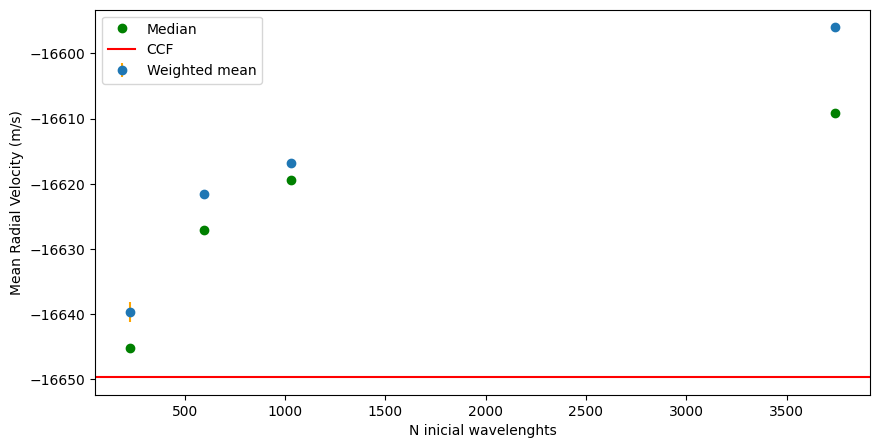

In [ ]:
#plt.errorbar(N_wave,Means+ARES_RV,yerr=Std,ecolor='blue',fmt='o',label='Mean')
plt.errorbar(N_wave,Means+ARES_RV,yerr=Std_root,ecolor='orange',fmt='o',label='Mean')
plt.plot(N_wave,Medians+ARES_RV,'o',label='Median',color='green')
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
#plt.axhline(ARES_RV,label='ARES RV',color='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.legend()
plt.show()

#plt.errorbar(N_wave,Wmeans+ARES_RV,yerr=Wstd,ecolor='blue',fmt='o',label='Weighted mean')
plt.errorbar(N_wave,Wmeans+ARES_RV,yerr=Wstd_root,ecolor='orange',fmt='o',label='Weighted mean')
plt.plot(N_wave,Medians+ARES_RV,'o',label='Median',color='green')
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
#plt.axhline(ARES_RV,label='ARES RV',color='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.legend()
plt.show()

## Percentage of wavelenght decrease

   N ref lines  N fitted lines  1st removal      1st %  2nd removal      2nd %
0          229             224          205  91.517857          188  83.928571
1          595             589          548  93.039049          510  86.587436
2         1030            1024          960  93.750000          902  88.085938
3         3741            3171         2963  93.440555         2742  86.471145


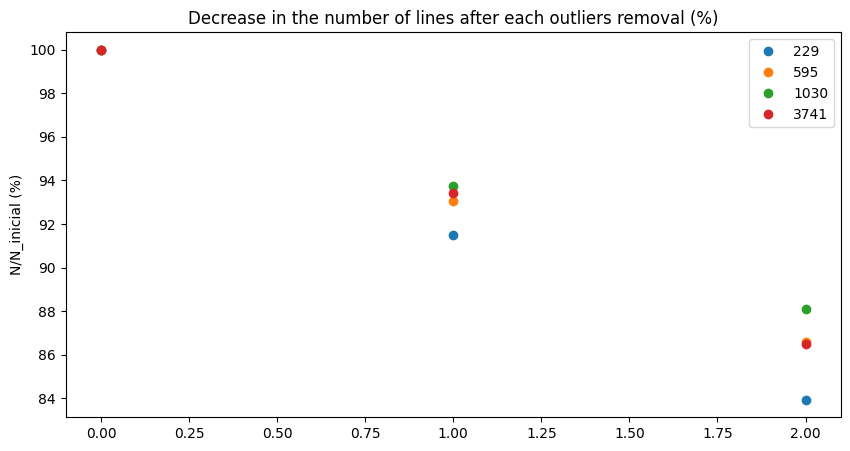

In [ ]:
data = {
    'N ref lines':[229,595,1030,3741],
    'N fitted lines':[N_dim_229[0],N_dim_595[0],N_dim_1030[0],N_dim_3741[0]],
    '1st removal':[N_dim_229[1],N_dim_595[1],N_dim_1030[1],N_dim_3741[1]],
    '1st %':[N_dim_229[1]/N_dim_229[0]*100,N_dim_595[1]/N_dim_595[0]*100,N_dim_1030[1]/N_dim_1030[0]*100,N_dim_3741[1]/N_dim_3741[0]*100],
    '2nd removal':[N_dim_229[2],N_dim_595[2],N_dim_1030[2],N_dim_3741[2]],
    '2nd %':[N_dim_229[2]/N_dim_229[0]*100,N_dim_595[2]/N_dim_595[0]*100,N_dim_1030[2]/N_dim_1030[0]*100,N_dim_3741[2]/N_dim_3741[0]*100]
}

# Create a DataFrame (table) from the data
df = pd.DataFrame(data)

# Display the table
print(df)

N_dim_229_per = np.array([1,N_dim_229[1] / N_dim_229[0],N_dim_229[2] / N_dim_229[0]])*100
N_dim_595_per = np.array([1,N_dim_595[1] / N_dim_595[0],N_dim_595[2] / N_dim_595[0]])*100
N_dim_1030_per = np.array([1,N_dim_1030[1] / N_dim_1030[0],N_dim_1030[2] / N_dim_1030[0]])*100
N_dim_3741_per = np.array([1,N_dim_3741[1] / N_dim_3741[0],N_dim_3741[2] / N_dim_3741[0]])*100


plt.plot(N_dim_229_per,'o',label='229')
plt.plot(N_dim_595_per,'o',label='595')
plt.plot(N_dim_1030_per,'o',label='1030')
plt.plot(N_dim_3741_per,'o',label='3741')
plt.legend()
plt.title('Decrease in the number of lines after each outliers removal (%)')
plt.ylabel('N/N_inicial (%)')
plt.show()

## Histograms of the error

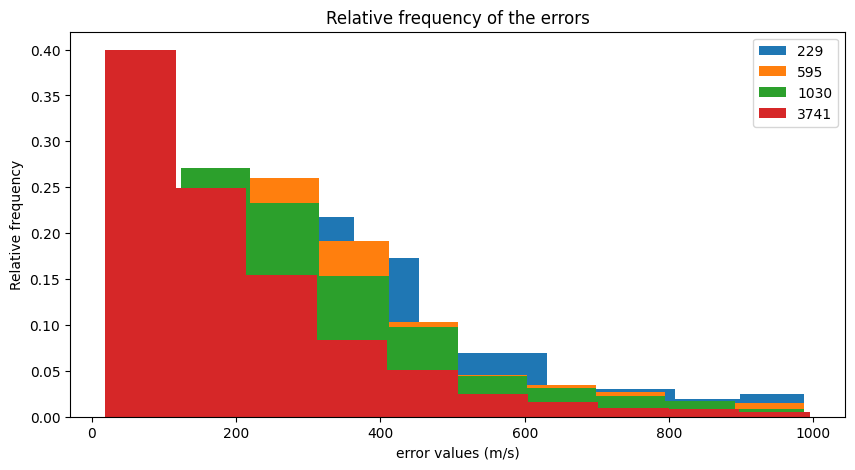

In [ ]:
new_uncert_229 = [x for x in uncert_229 if x < 1e3]
plt.hist(new_uncert_229,weights=np.zeros_like(new_uncert_229) + 1. / len(new_uncert_229),label='229')

new_uncert_595 = [x for x in uncert_595 if x < 1e3]
plt.hist(new_uncert_595,weights=np.zeros_like(new_uncert_595) + 1. / len(new_uncert_595),label='595')

new_uncert_1030 = [x for x in uncert_1030 if x < 1e3]
plt.hist(new_uncert_1030,weights=np.zeros_like(new_uncert_1030) + 1. / len(new_uncert_1030),label='1030')

new_uncert_3741 = [x for x in uncert_3741 if x < 1e3]
plt.hist(new_uncert_3741,weights=np.zeros_like(new_uncert_3741) + 1. / len(new_uncert_3741),label='3741')

plt.title('Relative frequency of the errors')
plt.xlabel('error values (m/s)')
plt.ylabel('Relative frequency')
plt.legend()
plt.show()

## Uncertanty as a function of wavelenght

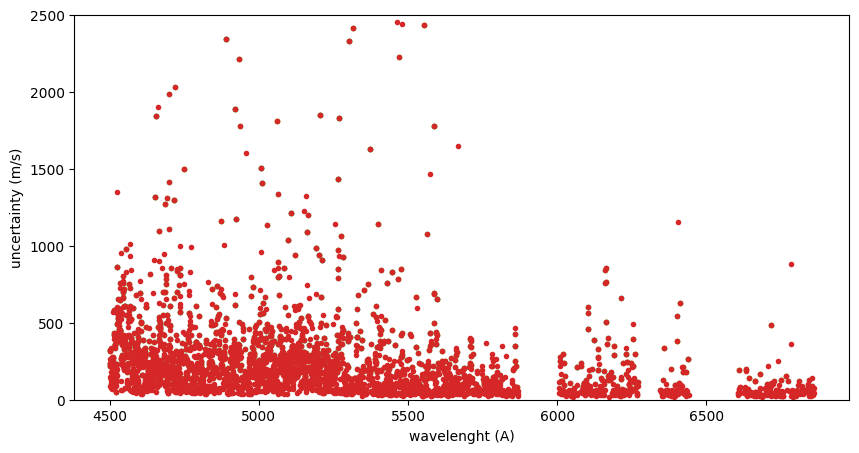

In [ ]:
plt.plot(lambda_fit_229,uncert_229,'.')
plt.plot(lambda_fit_595,uncert_595,'.')
plt.plot(lambda_fit_1030,uncert_1030,'.')
plt.plot(lambda_fit_3741,uncert_3741,'.')
plt.ylim(0,2500)
plt.xlabel('wavelenght (A)')
plt.ylabel('uncertainty (m/s)')
plt.show()